In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_3/Lab_3_Data-Cleaning-Challenge/iris-data.csv')

In [3]:
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# 150 rows
iris.shape

(150, 5)

In [5]:
# 5 missing vamies in column 3
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# locate the 5 null values
iris[iris['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


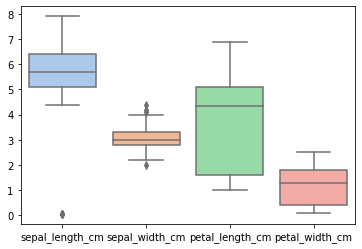

In [13]:
# check outliers with plot
ax = sns.boxplot(data=iris, palette="pastel")

In [14]:
# check irregular values in 'class'
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [18]:
# modify irregular values
iris.replace('versicolor', 'Iris-versicolor', inplace= True)
iris['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Iris-setossa        1
Name: class, dtype: int64

In [19]:
iris.replace('Iris-setossa', 'Iris-setosa', inplace = True)

In [20]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [21]:
# fill the NaN values with interpolate()
iris_fixed = iris.interpolate()

In [22]:
iris_fixed

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# verify if NaN have been filled
iris_fixed['petal_width_cm'].isnull().sum()

0

In [28]:
iris['sepal_length_cm'].value_counts()

5.000    10
5.100     9
6.300     9
5.700     8
5.600     7
6.400     7
5.800     7
6.700     7
6.100     6
4.900     6
5.400     6
4.800     5
6.500     5
5.500     5
6.000     5
4.600     4
6.900     4
6.200     4
5.200     4
4.400     3
6.800     3
5.900     3
7.700     3
7.200     3
0.055     2
6.600     2
4.700     2
7.000     1
0.067     1
0.060     1
0.057     1
5.300     1
7.100     1
7.600     1
7.300     1
4.500     1
7.400     1
7.900     1
Name: sepal_length_cm, dtype: int64

In [36]:
# drop outliers column by column
# not sure about this action

iris_fixed.drop(iris_fixed[(iris_fixed['sepal_length_cm'] > 8) | (iris_fixed['sepal_length_cm'] < 4)].index, inplace=True)
iris_fixed.drop(iris_fixed[(iris_fixed['sepal_width_cm'] > 4) | (iris_fixed['sepal_width_cm'] < 2)].index, inplace=True)
iris_fixed.drop(iris_fixed[(iris_fixed['petal_length_cm'] > 7) | (iris_fixed['petal_length_cm'] < 1)].index, inplace=True)
iris_fixed.drop(iris_fixed[(iris_fixed['petal_width_cm'] > 3) | (iris_fixed['petal_width_cm'] < 0)].index, inplace=True)
iris_fixed.reset_index(inplace=True)

In [47]:
# round the values in column 'petal_width_cm'
iris_fixed['petal_width_cm'] = iris_fixed['petal_width_cm'].round(decimals = 1)

In [48]:
iris_fixed.to_csv(r'/Users/tinghaokao/Desktop/IronHackLabs_Ting/Module_3/Lab_3/iris_fixed.csv')